# KMeans

In [1]:
# necessary liberary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

# liberary for scalling and model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to confirm
print('liberaries imported successfully...!')

liberaries imported successfully...!


In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
# descriptive statistics
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
# most of the columns are having outliers
# there is no missing value

In [5]:
# confirm null values
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
# check duplicated values
df.duplicated().sum()

1

In [7]:
# remove duplicated value
df.drop_duplicates(inplace=True)
# check again
df.duplicated().sum()

0

In [8]:
# check datatype of columns
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
# all columnns are having their proper datatype

In [10]:
# get detailed analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

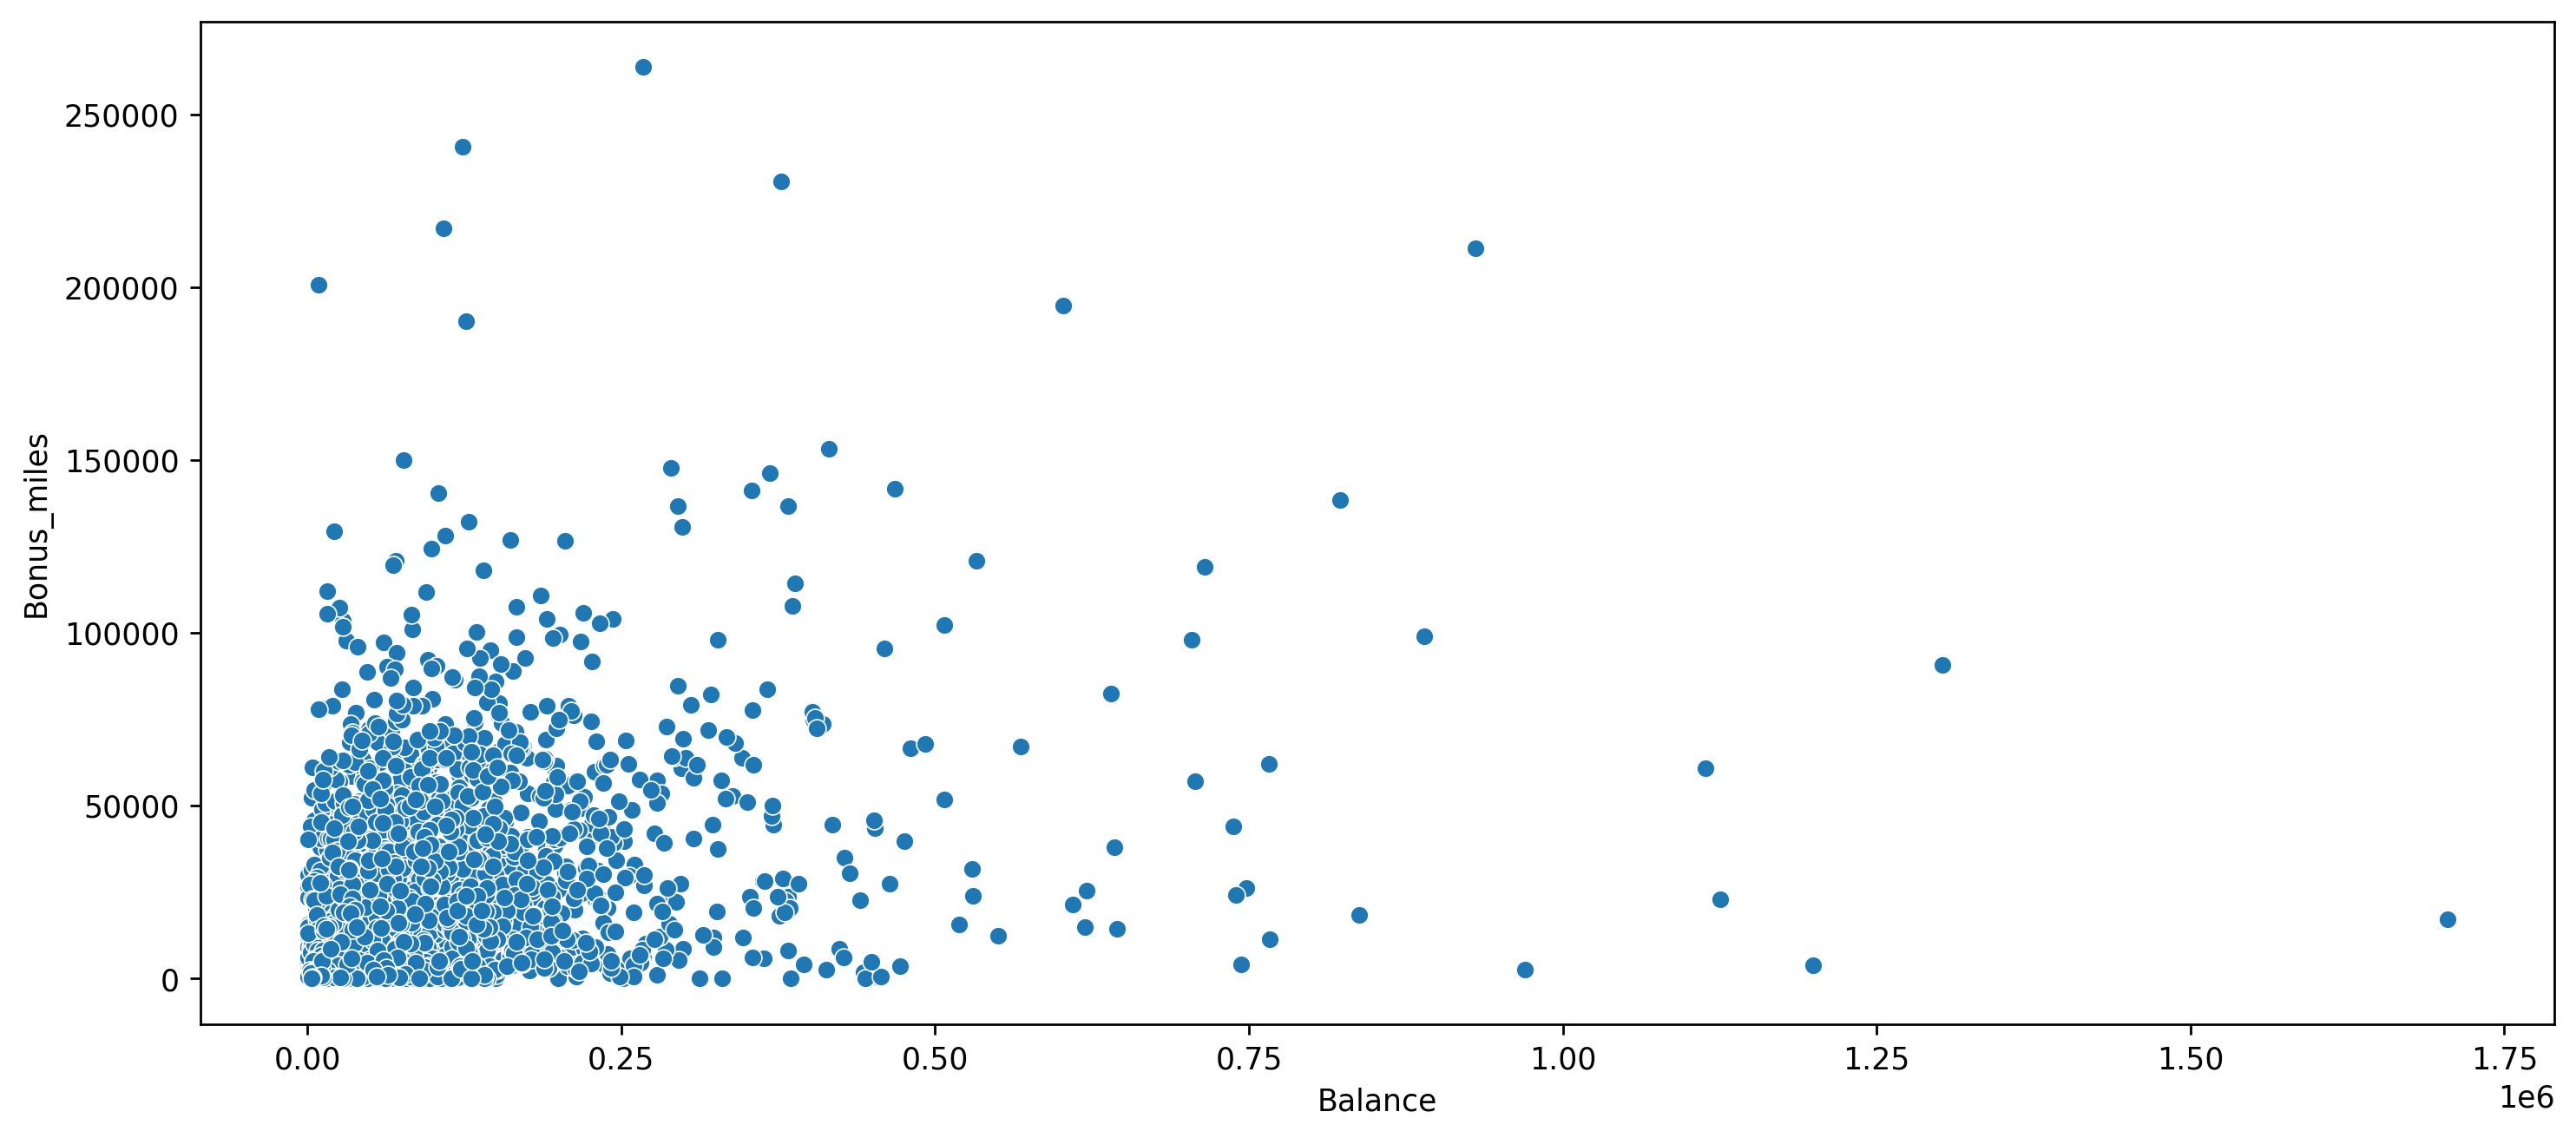

In [11]:
# scatterplot
sns.scatterplot(data=df, x='Balance', y='Bonus_miles')

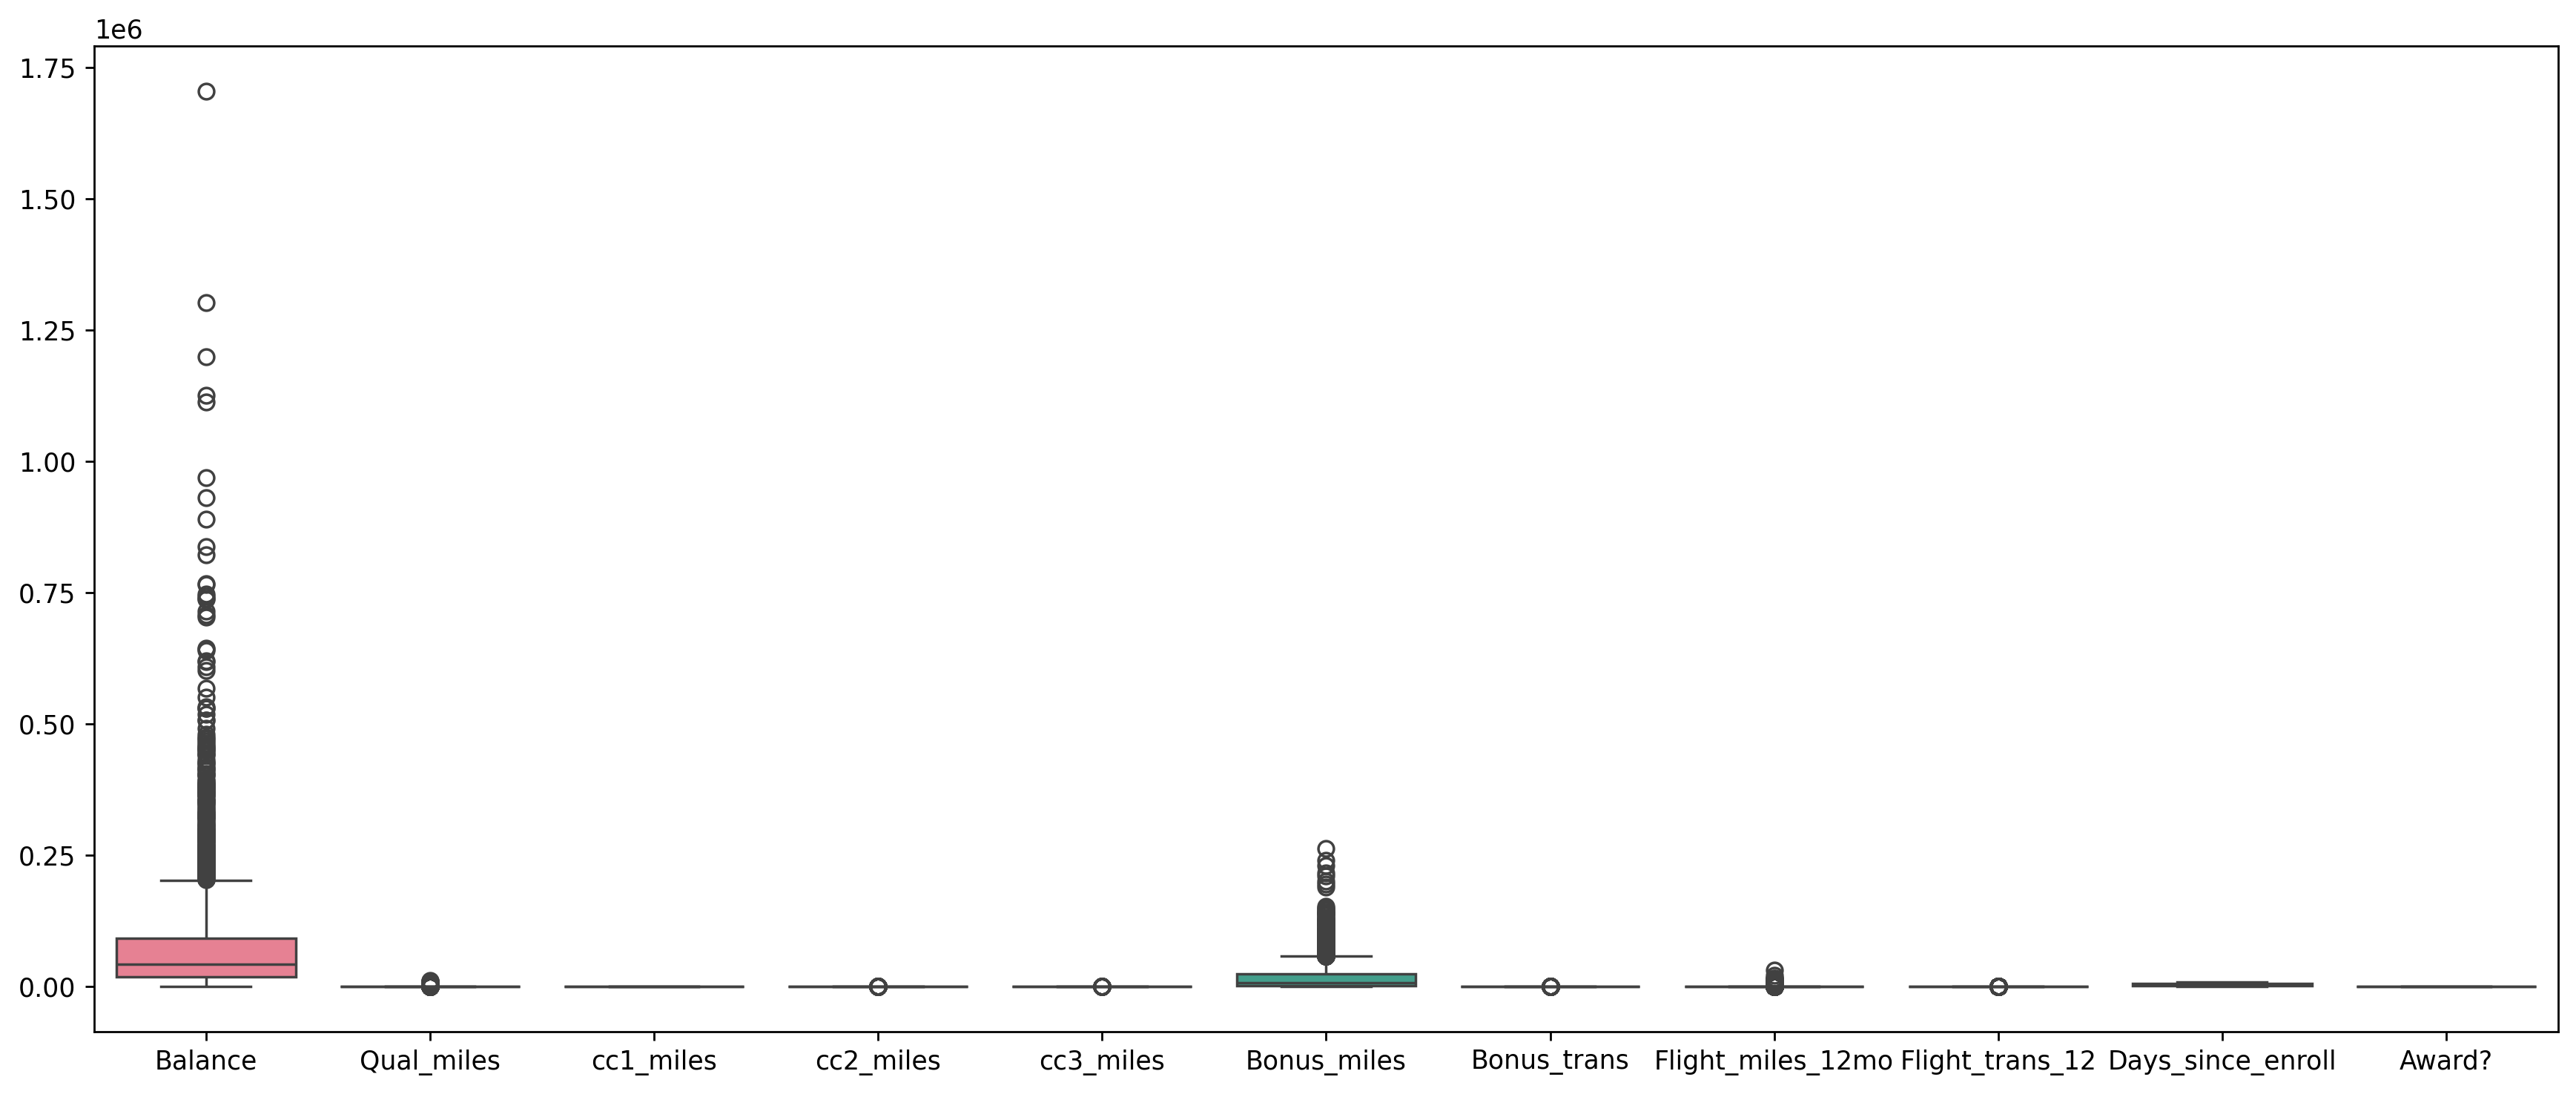

In [12]:
# detect outliers with boxplot
sns.boxplot(df)
plt.tight_layout()

In [13]:
# function for capping the outliers because the data size is small
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower = q3 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))

In [14]:
# capping the outliers
capping(df, df.columns)

<Axes: >

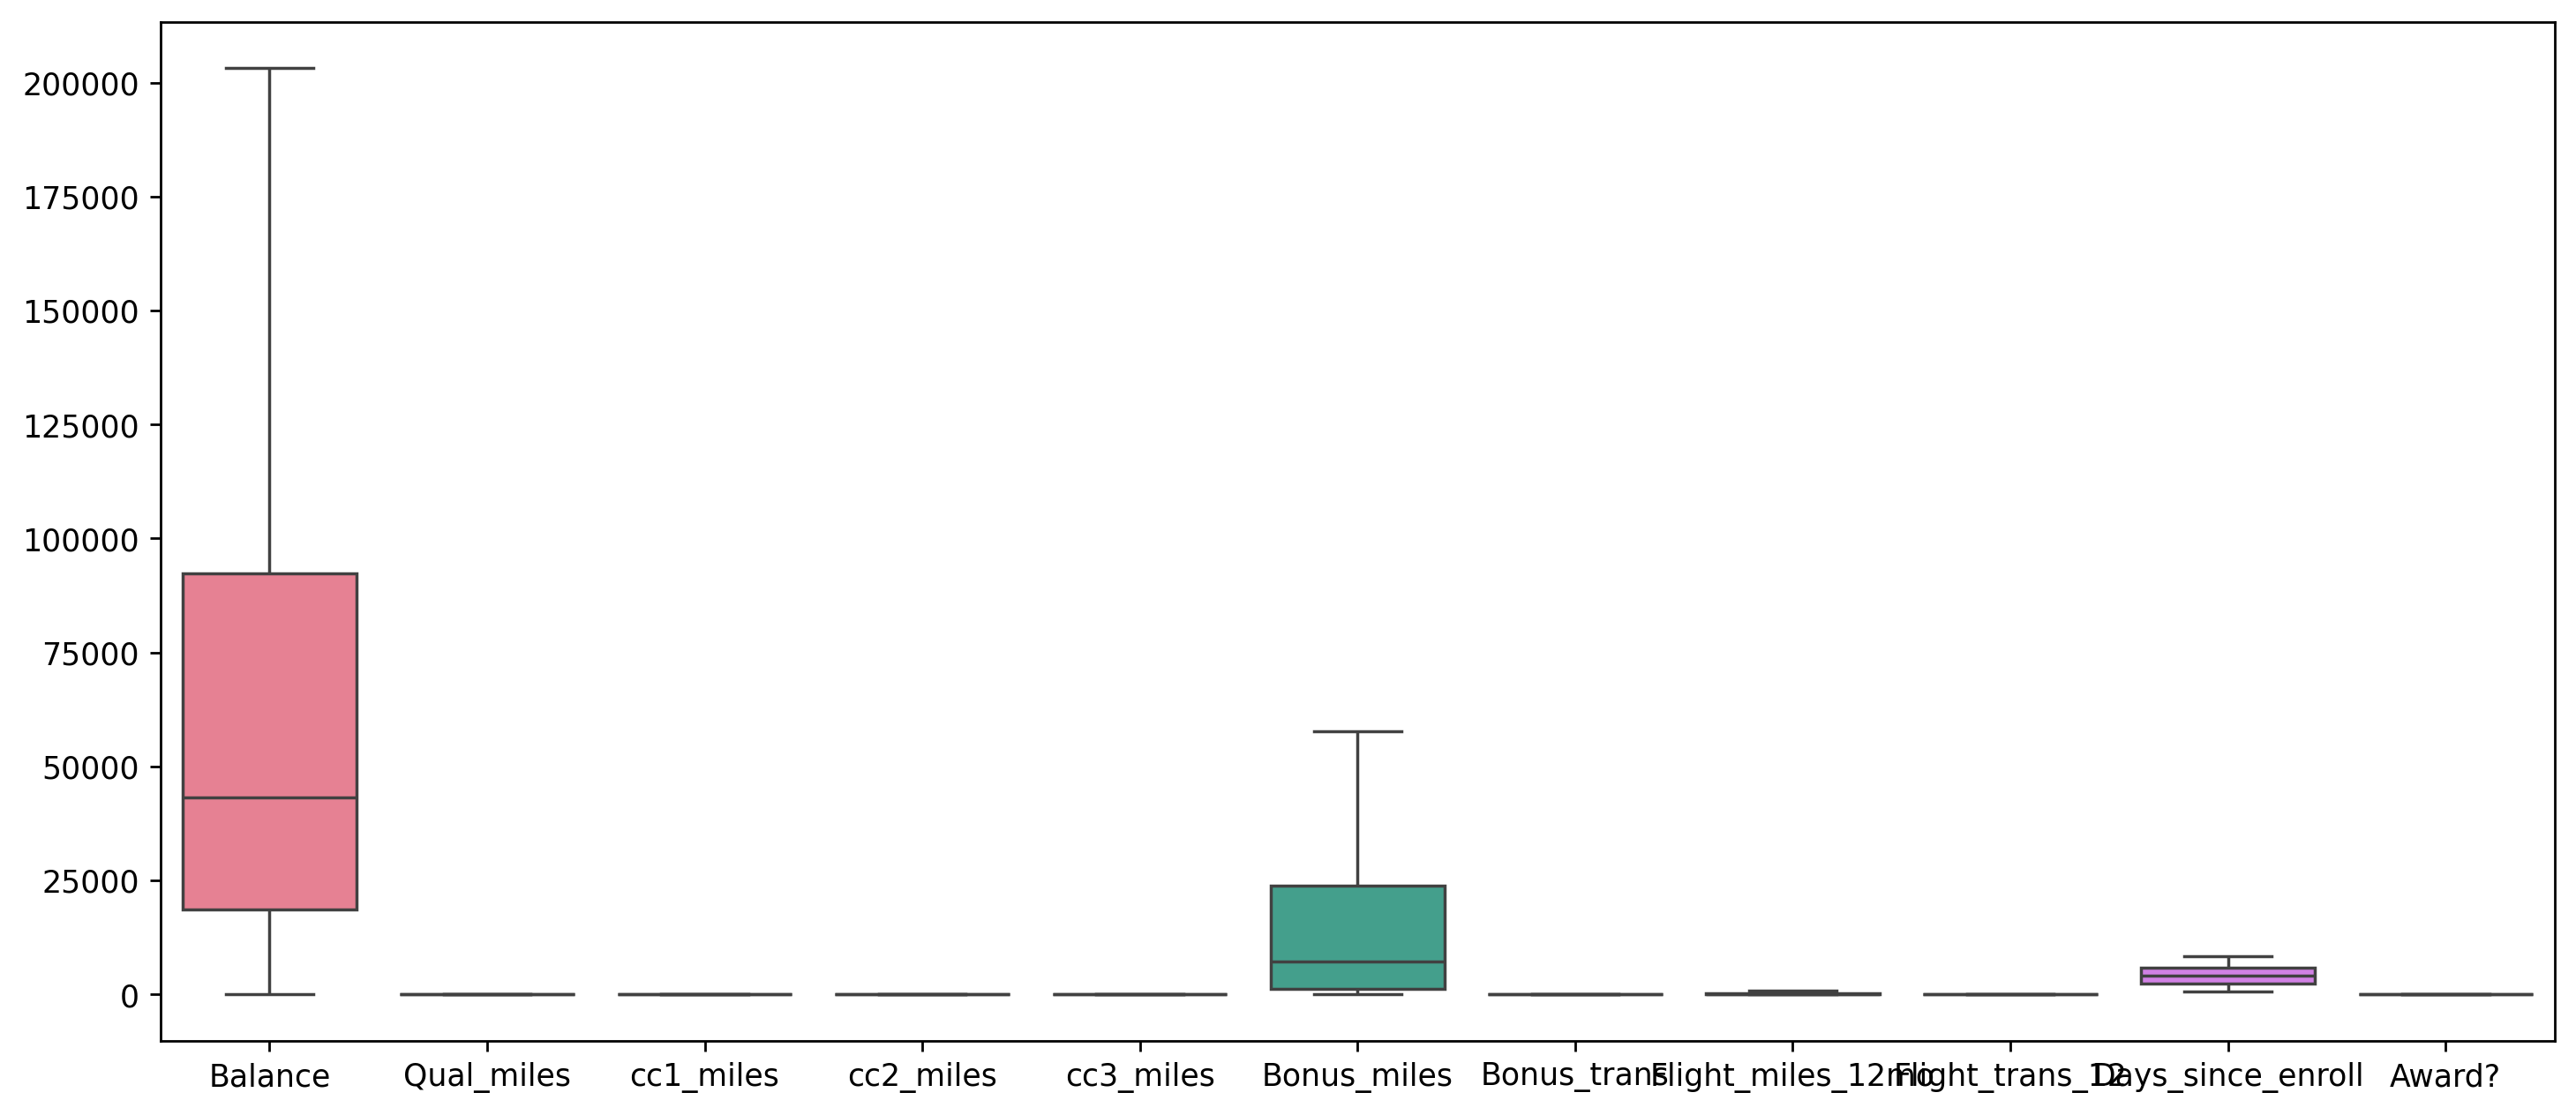

In [15]:
sns.boxplot(df)

 outliers capped successfully

# Feature Engineering

In [16]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0


In [17]:
# choosing important column only and droping unncessary columns according to the data dicitonary
df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles'], inplace=True)

In [18]:
df.head(3)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,
1,28143.0,0.0,174.0,1.0,0.0,0.0,7000.0,0.0
2,19244.0,0.0,215.0,2.0,0.0,0.0,6968.0,0.0
3,41354.0,0.0,4123.0,4.0,0.0,0.0,7034.0,0.0


# Data Visualization

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

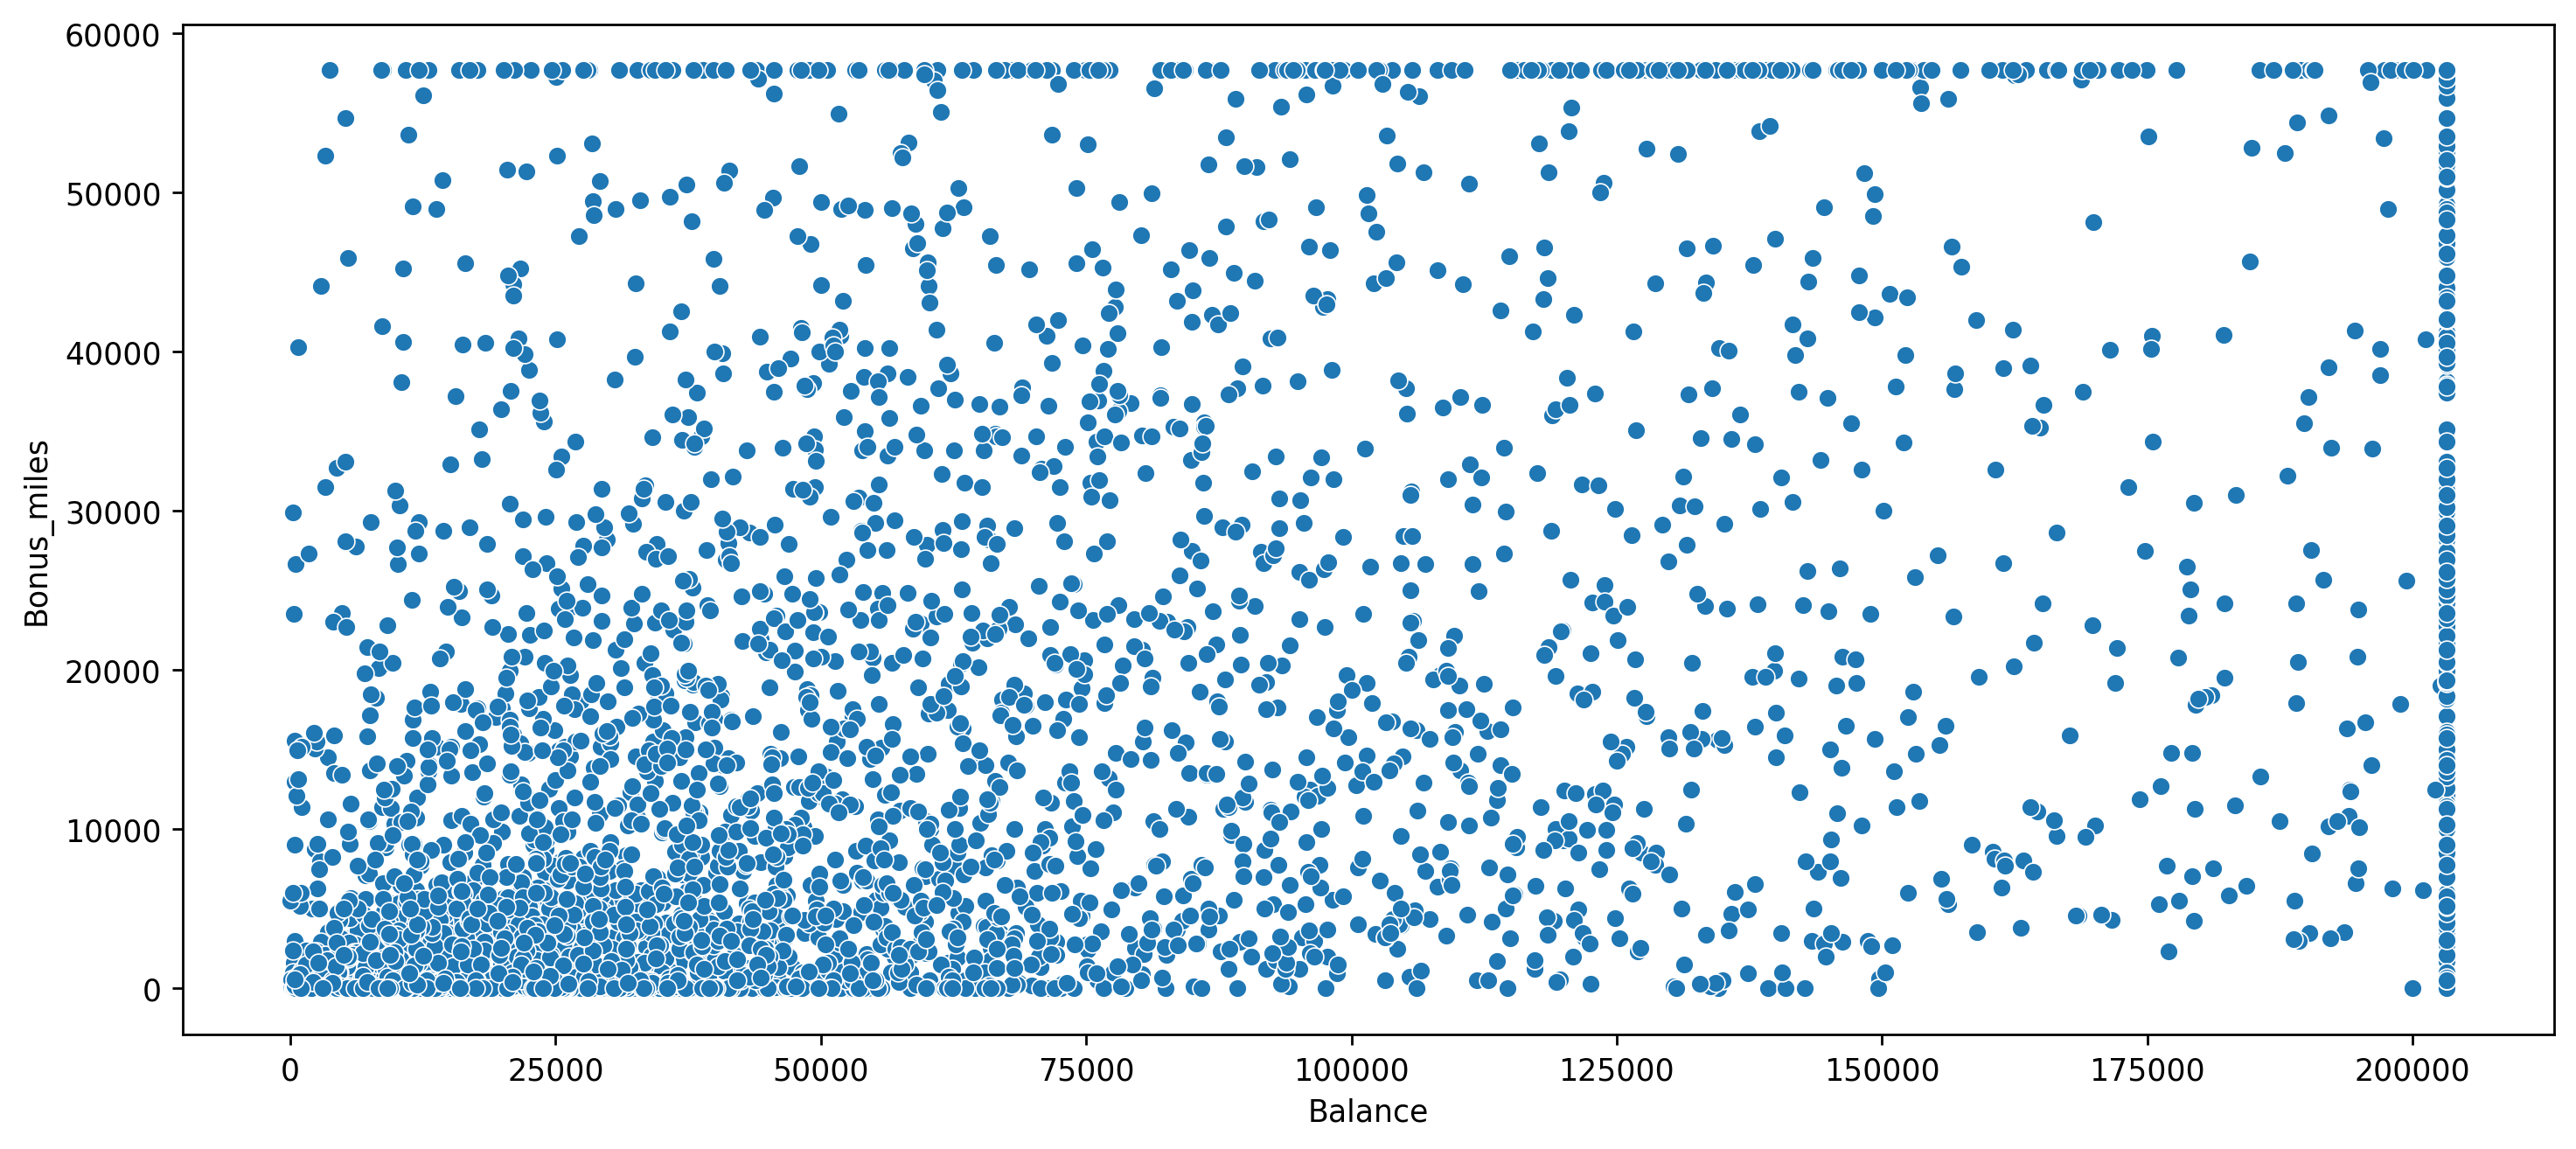

In [19]:
sns.scatterplot(data=df, x='Balance', y='Bonus_miles')

# DATA TRANSFORMATION

In [20]:
# FEATURE SCALLING


In [21]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-0.60754076,  0.        , -0.84317887, ..., -0.62625242,
         1.40054684, -0.76707163],
       [-0.75923491,  0.        , -0.84091083, ..., -0.62625242,
         1.38495074, -0.76707163],
       [-0.38234339,  0.        , -0.62472782, ..., -0.62625242,
         1.41711768, -0.76707163],
       ...,
       [ 0.1672773 ,  0.        ,  0.55487466, ..., -0.62625242,
        -1.32779453,  1.30365921],
       [-0.15145258,  0.        , -0.82514518, ...,  0.43219492,
        -1.32828191, -0.76707163],
       [-1.03586068,  0.        , -0.85280422, ..., -0.62625242,
        -1.32974405, -0.76707163]])

In [22]:
pd.DataFrame(x, columns=df.columns)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607541,0.0,-0.843179,-1.149253,-0.603723,-0.626252,1.400547,-0.767072
1,-0.759235,0.0,-0.840911,-1.039523,-0.603723,-0.626252,1.384951,-0.767072
2,-0.382343,0.0,-0.624728,-0.820064,-0.603723,-0.626252,1.417118,-0.767072
3,-0.835397,0.0,-0.825145,-1.149253,-0.603723,-0.626252,1.377153,-0.767072
4,0.579028,0.0,1.542468,1.593991,2.039825,2.019866,1.368867,1.303659
...,...,...,...,...,...,...,...,...
3993,-0.772326,0.0,-0.381218,-0.820064,0.070867,0.432195,-1.327307,1.303659
3994,0.010248,0.0,-0.798537,-0.710334,-0.603723,-0.626252,-1.331206,1.303659
3995,0.167277,0.0,0.554875,-0.381145,-0.603723,-0.626252,-1.327795,1.303659
3996,-0.151453,0.0,-0.825145,-1.149253,1.082751,0.432195,-1.328282,-0.767072


# MODEL BUILDING

In [23]:
# MODEL building with random numeber of clusters
model = KMeans(n_clusters=4)
ypred = model.fit_predict(x)
ypred

array([0, 0, 0, ..., 3, 0, 0])

In [24]:
len(ypred)

3998

In [25]:
np.unique(ypred)

array([0, 1, 2, 3])

In [26]:
# 4 clusters have been created

# MODLE EVALUATION

In [27]:
silhouette_score(x, ypred)

0.2790837907894869

 accuracy is very less because I random number of selected for model building.
 I need to do Hyperparameter Tunning to tune the model

# Hyperparameter Tunning

In [33]:
# getting WCSS(within cluster sum of squared)/inertia/VWC(variance within the cluster)
inertia = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    inertia.append(km.inertia_)

In [29]:
# average euclidean distances for each model with different clusters
inertia

[19602.642309014103,
 15684.545383773444,
 13954.187068152569,
 12174.958697527163,
 10976.059374005501,
 10105.55556572825,
 9458.309639605086,
 9054.377396194144]

# ELBOW GRAPH

Text(0.5, 1.0, 'elbow graph')

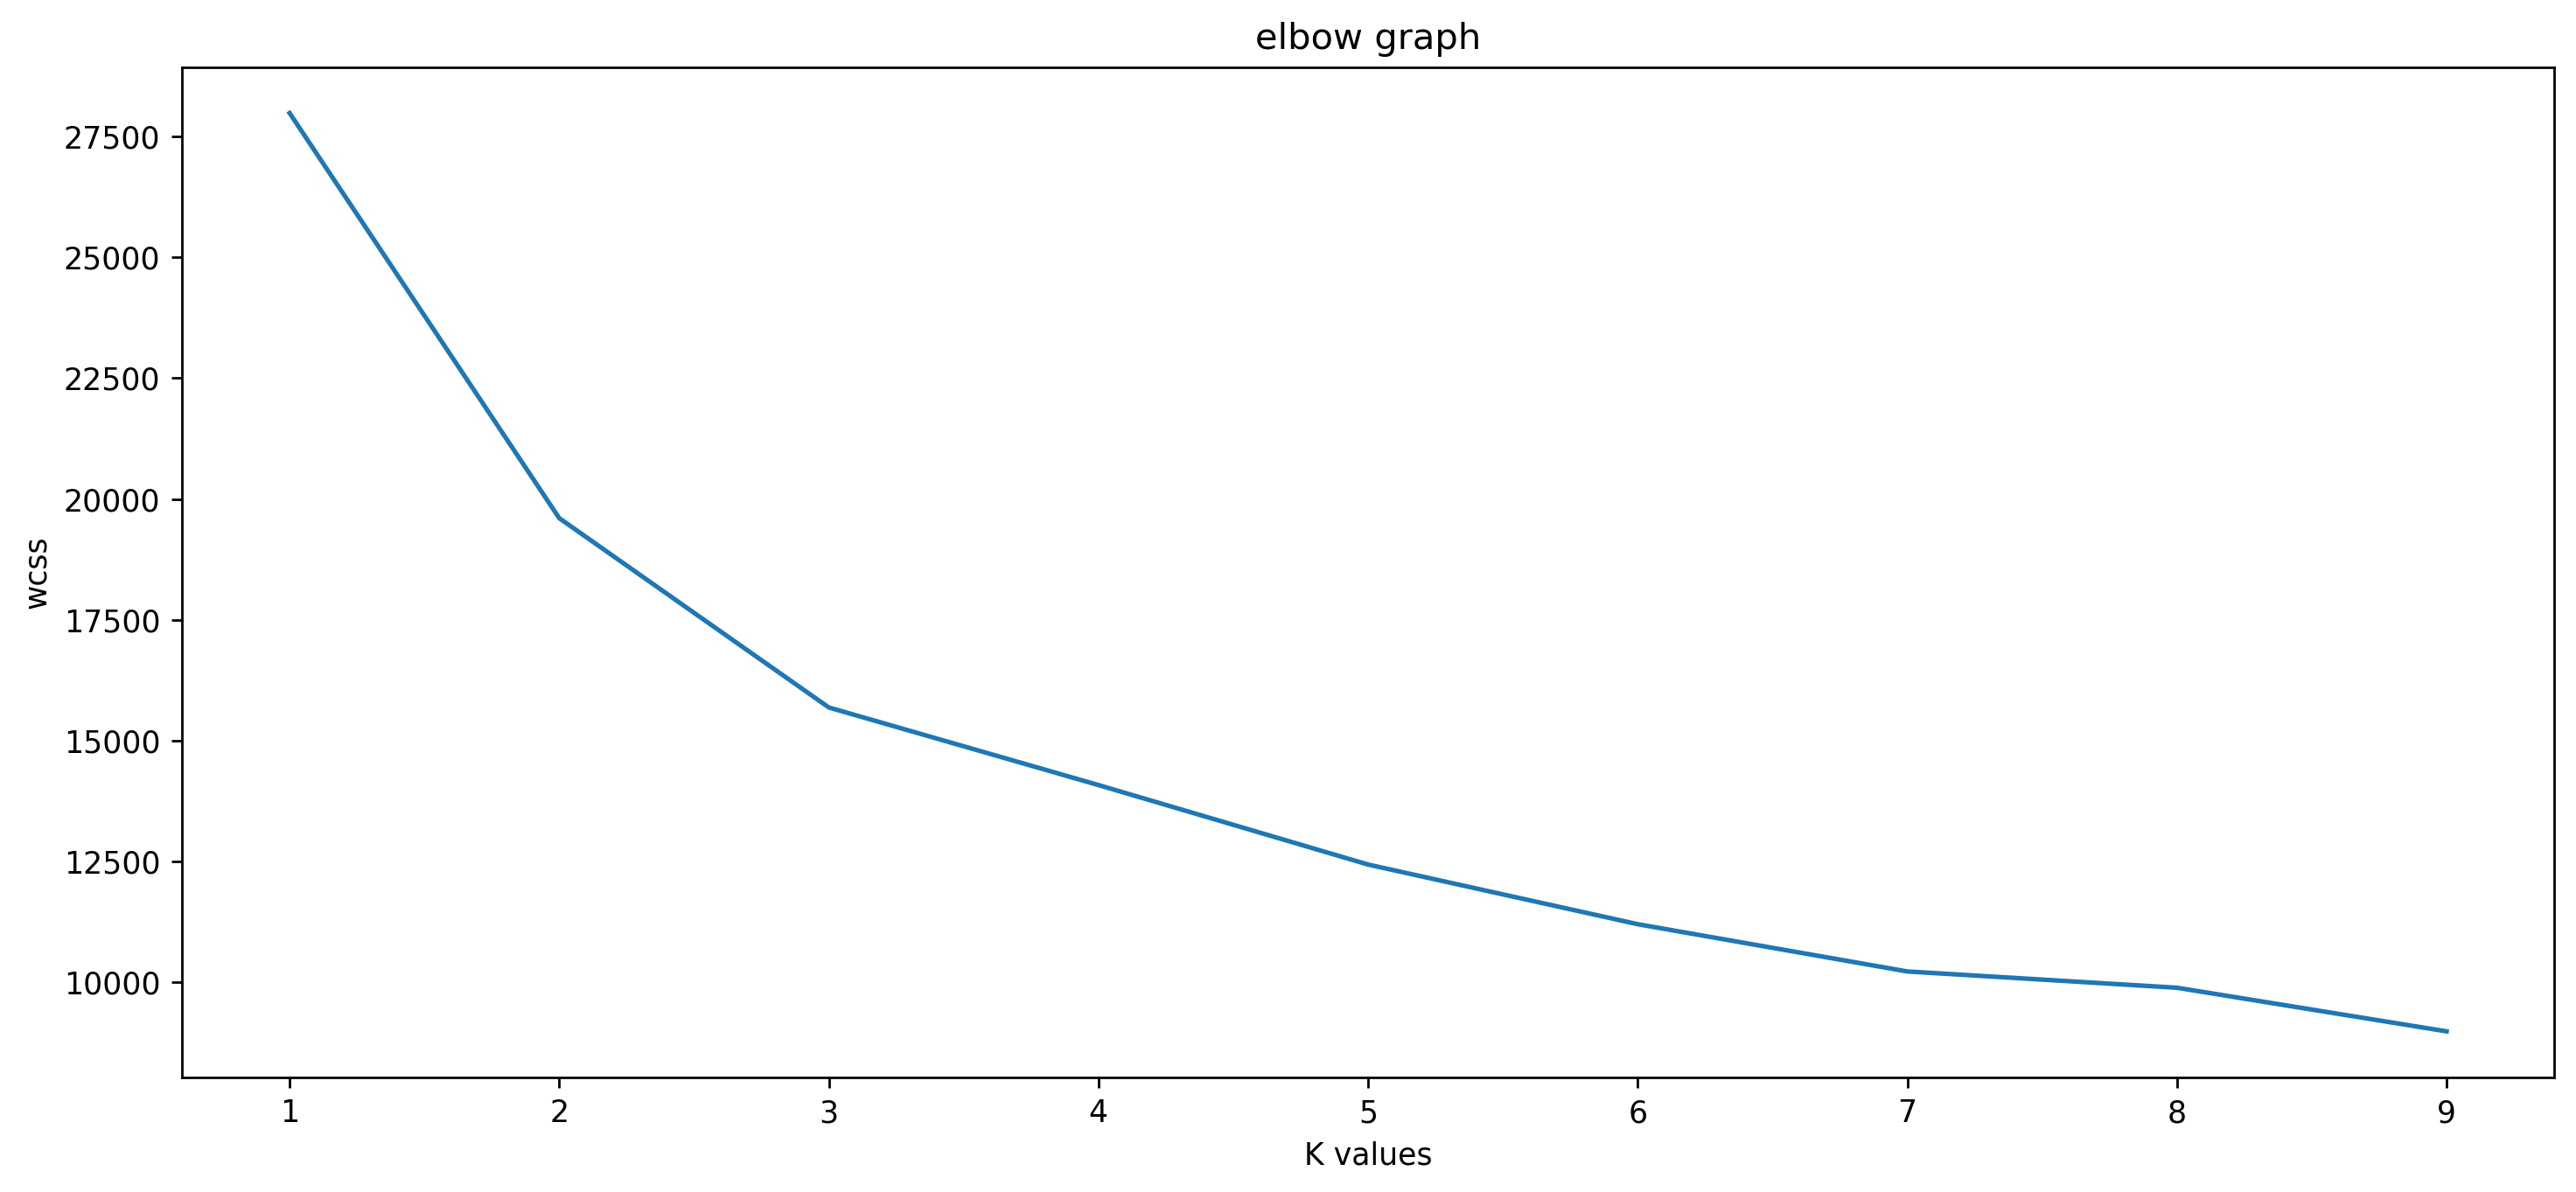

In [34]:
plt.plot(range(1, 10), inertia)
plt.xlabel('K values')
plt.ylabel('wcss')
plt.title('elbow graph')

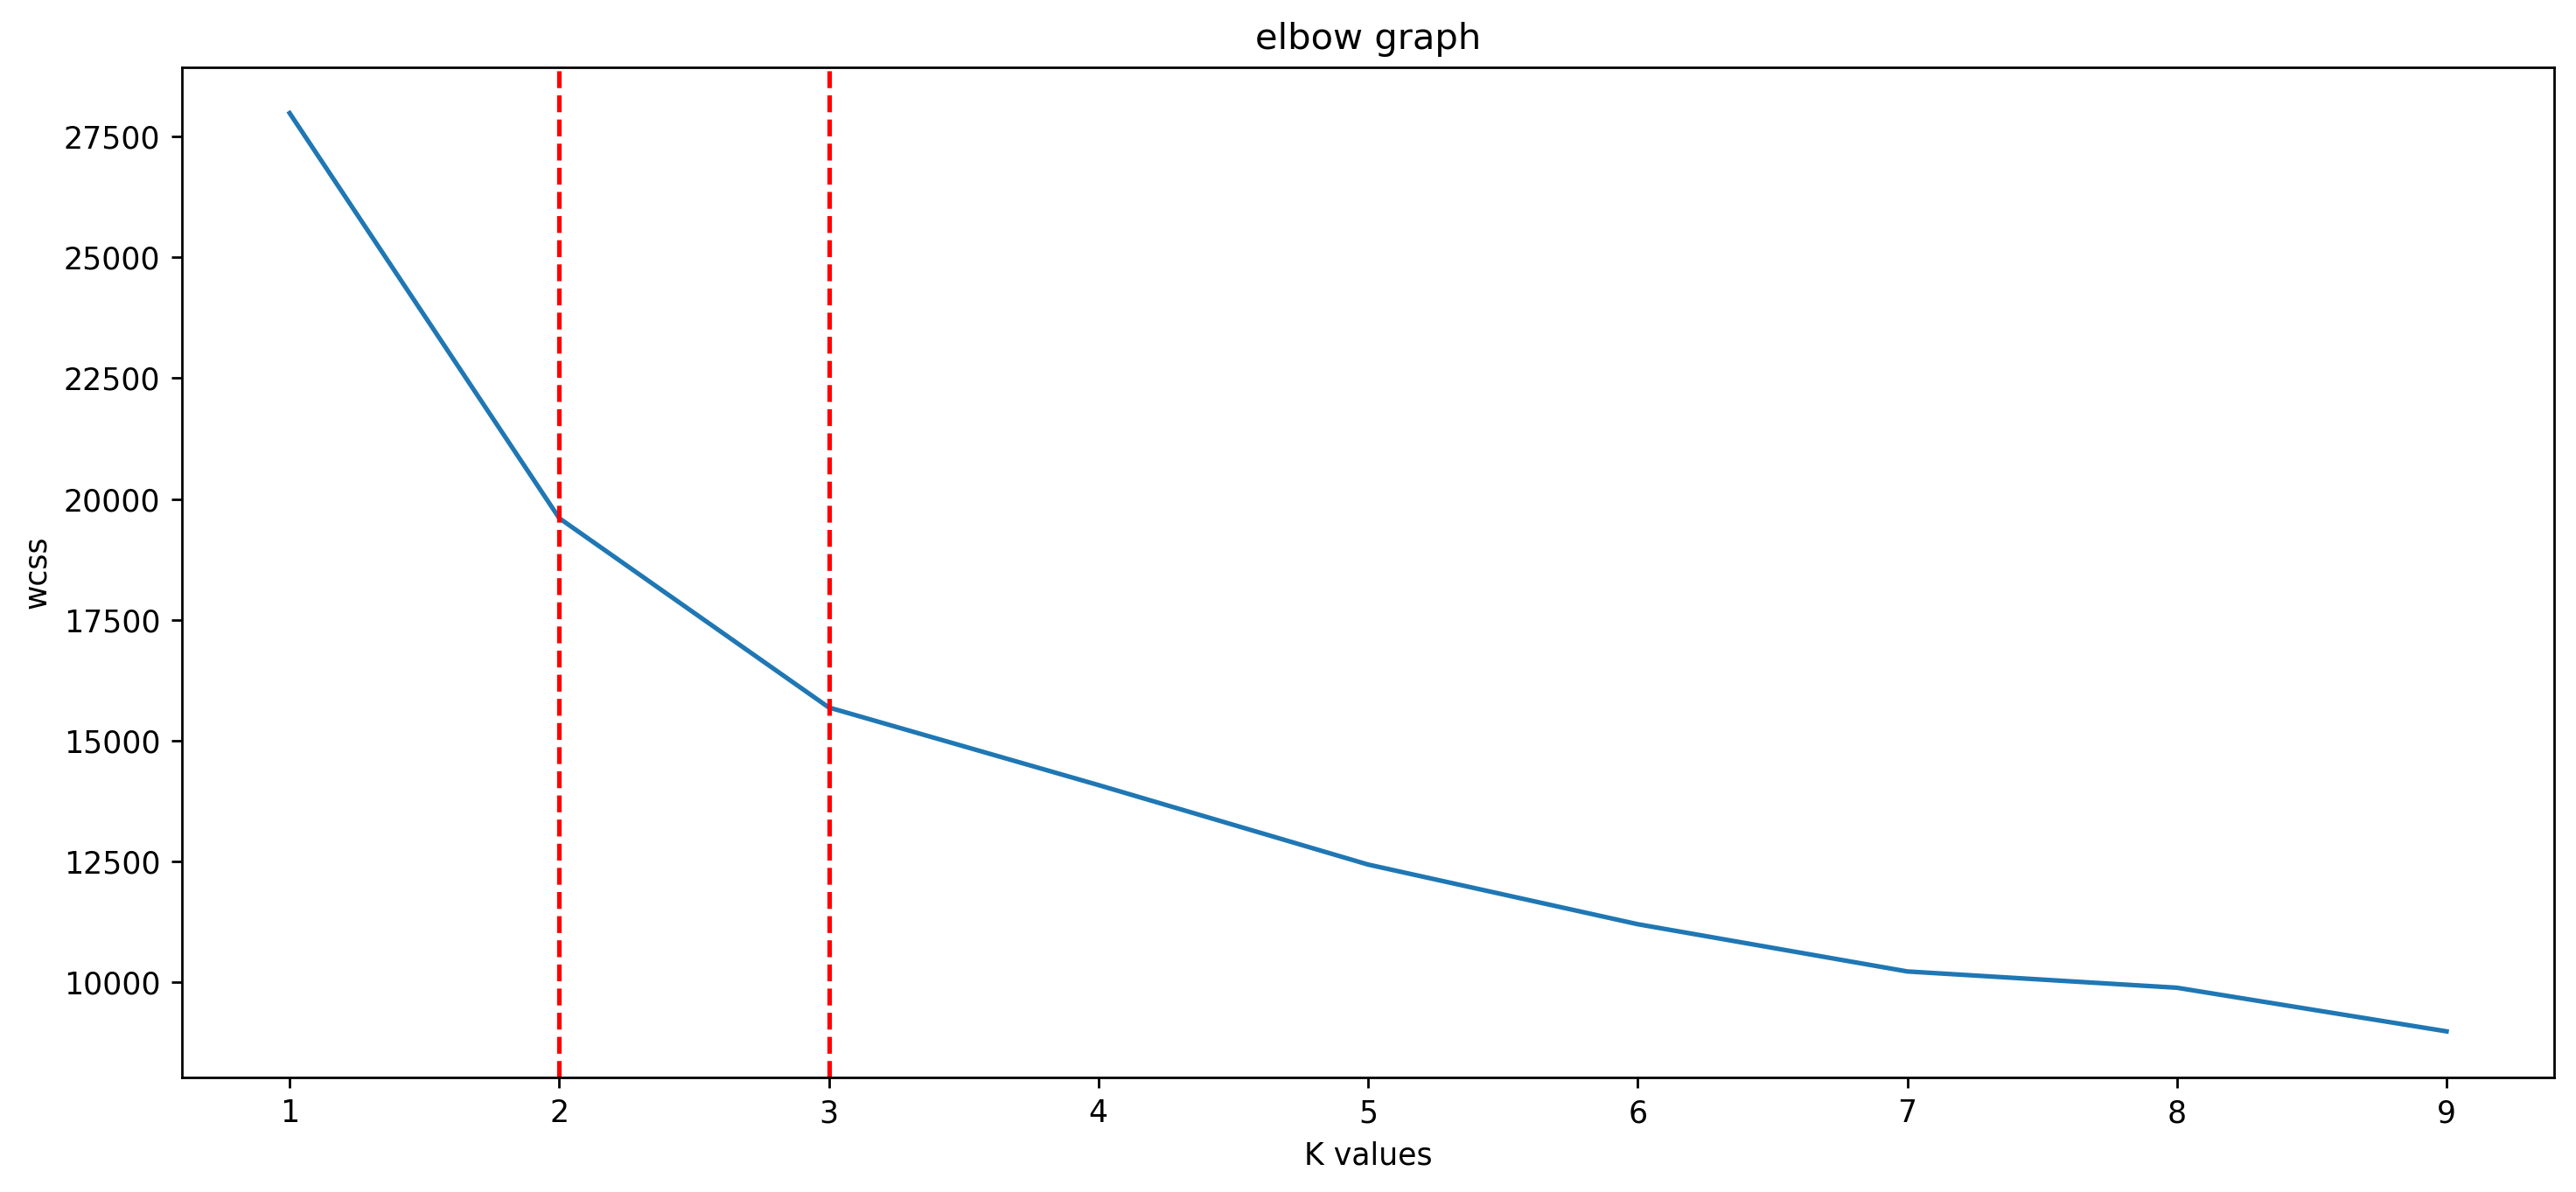

In [37]:
plt.plot(range(1, 10), inertia)
plt.xlabel('K values')
plt.ylabel('wcss')
plt.title('elbow graph')
plt.axvline(x=2 ,color='red', linestyle='--')
plt.axvline(x=3 ,color='red', linestyle='--')

 I need to check both the values like whether 2 clusters or 3 clusters are giving me good results

#### Testing

In [38]:
model1 = KMeans(n_clusters=2)
ypred1 = model1.fit_predict(x)
ypred1

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
# checking silhouette score
silhouette_score(x, ypred1)

0.3508515423809507

In [40]:
model2 = KMeans(n_clusters=3)
ypred2 = model2.fit_predict(x)
ypred2

array([2, 2, 2, ..., 0, 2, 2])

In [41]:
# checking silhouette score
silhouette_score(x, ypred2)

0.2747443069349084

I can clearly see that 2 clusters are generating good results(silhouette score), so I will go ahead with 2 clusters

# FINAL MODEL

In [45]:
model = KMeans(n_clusters=2)
ypred = model.fit_predict(x)
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
np.unique(ypred)

array([0, 1])

6 clusters have been created

# MODEL EVALUATION

In [47]:
accuracy = silhouette_score(x, ypred)
accuracy

0.3508515423809507

# ANALYSIS OF CLUSTERS

In [49]:
df['clusters'] = ypred
df.head(2)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
ID#,,,,,,,,,
1,28143.0,0.0,174.0,1.0,0.0,0.0,7000.0,0.0,1
2,19244.0,0.0,215.0,2.0,0.0,0.0,6968.0,0.0,1


In [50]:
df.groupby('clusters').mean()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,
0,103217.648894,0.0,26276.065913,17.580038,603.814736,1.932674,4657.230226,0.676083
1,49519.960192,0.0,11488.247658,9.264646,25.323399,0.106608,3934.340259,0.259877


in the 1st group (cluster label 0) people are having higher amount of Balance, Bonus_miles, Flight_miles_12mo, Days_since_enroll in comparision to the 2nd grop(cluster label 1) where peole are having high values for these things.